## Analyzing Data

In [102]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn import metrics

pd.set_option("display.max_columns", None)

In [103]:
df = pd.read_csv('cleanedData_training.csv')

In [104]:
# df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         72983 non-null  int64  
 1   RefId                              72983 non-null  int64  
 2   IsBadBuy                           72983 non-null  int64  
 3   PurchDate                          72983 non-null  object 
 4   Auction                            72983 non-null  object 
 5   VehYear                            72983 non-null  int64  
 6   VehicleAge                         72983 non-null  int64  
 7   Make                               72983 non-null  object 
 8   Model                              72983 non-null  object 
 9   SubModel                           72983 non-null  object 
 10  Color                              72983 non-null  object 
 11  Transmission                       72983 non-null  obj

We have already removed 'PRIMEUNIT' 'AUCGUART', 'WheelType' 

'VNZIP' describes the zip code where the car was purchased and 'VNST' describes the state where it was purchased. These two are highly correlated to each other. So, let's remove the dedundant categorical feature - 'VNST'. 

'VehYear' can also be dropped as we already have 'VehicleAge'.

'RefId' is the primary key. 'IsBadBuy' doesn't have any dependency upon 'RefId'. So, let's drop this too.


In [105]:
df = df.drop(['Unnamed: 0','VNST','VehYear','RefId'],axis=1)

In [106]:
df

,IsBadBuy,PurchDate,Auction,VehicleAge,Make,Model,SubModel,Color,Transmission,WheelTypeID,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost
0,0,12/7/2009,ADESA,3,MAZDA,MAZDA3,4D SEDAN I,RED,AUTO,1.0,89046,OTHER ASIAN,MEDIUM,OTHER,8155.0,9829.0,11636.0,13600.0,7451.0,8552.0,11597.0,12409.0,21973,33619,7100.0,0,1113
1,0,12/7/2009,ADESA,5,DODGE,1500 RAM PICKUP 2WD,QUAD CAB 4.7L SLT,WHITE,AUTO,1.0,93593,AMERICAN,LARGE TRUCK,CHRYSLER,6854.0,8383.0,10897.0,12572.0,7456.0,9222.0,11374.0,12791.0,19638,33619,7600.0,0,1053
2,0,12/7/2009,ADESA,4,DODGE,STRATUS V6,4D SEDAN SXT FFV,MAROON,AUTO,2.0,73807,AMERICAN,MEDIUM,CHRYSLER,3202.0,4760.0,6943.0,8457.0,4035.0,5557.0,7146.0,8702.0,19638,33619,4900.0,0,1389
3,0,12/7/2009,ADESA,5,DODGE,NEON,4D SEDAN,SILVER,AUTO,1.0,65617,AMERICAN,COMPACT,CHRYSLER,1893.0,2675.0,4658.0,5690.0,1844.0,2646.0,4375.0,5518.0,19638,33619,4100.0,0,630
4,0,12/7/2009,ADESA,4,FORD,FOCUS,2D COUPE ZX3,SILVER,MANUAL,2.0,69367,AMERICAN,COMPACT,FORD,3913.0,5054.0,7723.0,8707.0,3247.0,4384.0,6739.0,7911.0,19638,33619,4000.0,0,1020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72978,1,12/2/2009,ADESA,8,MERCURY,SABLE,4D SEDAN GS,BLACK,AUTO,1.0,45234,AMERICAN,MEDIUM,FORD,1996.0,2993.0,2656.0,3732.0,2190.0,3055.0,4836.0,5937.0,18111,30212,4200.0,0,993
72979,0,12/2/2009,ADESA,2,CHEVROLET,MALIBU 4C,4D SEDAN LS,SILVER,AUTO,2.0,71759,AMERICAN,MEDIUM,GM,6418.0,7325.0,7431.0,8411.0,6785.0,8132.0,10151.0,11652.0,18881,30212,6200.0,0,1038
72980,0,12/2/2009,ADESA,4,JEEP,GRAND CHEROKEE 2WD V,4D WAGON LAREDO,SILVER,AUTO,1.0,88500,AMERICAN,MEDIUM SUV,CHRYSLER,8545.0,9959.0,9729.0,11256.0,8375.0,9802.0,11831.0,14402.0,18111,30212,8200.0,0,1893
72981,0,12/2/2009,ADESA,3,CHEVROLET,IMPALA,4D SEDAN LS,WHITE,AUTO,1.0,79554,AMERICAN,LARGE,GM,6420.0,7604.0,7434.0,8712.0,6590.0,7684.0,10099.0,11228.0,18881,30212,7000.0,0,1974


### Univariate Analysis

In [107]:
print(df.columns)

Index(['IsBadBuy', 'PurchDate', 'Auction', 'VehicleAge', 'Make', 'Model',
       'SubModel', 'Color', 'Transmission', 'WheelTypeID', 'VehOdo',
       'Nationality', 'Size', 'TopThreeAmericanName',
       'MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice',
       'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice',
       'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice',
       'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice', 'BYRNO',
       'VNZIP1', 'VehBCost', 'IsOnlineSale', 'WarrantyCost'],
      dtype='object')


C:\Users\Shreya Pamecha\anaconda3\envs\new_env\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Shreya Pamecha\anaconda3\envs\new_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Shreya Pamecha\anaconda3\envs\new_env\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Shreya Pamecha\anaconda3\envs\new_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please ad

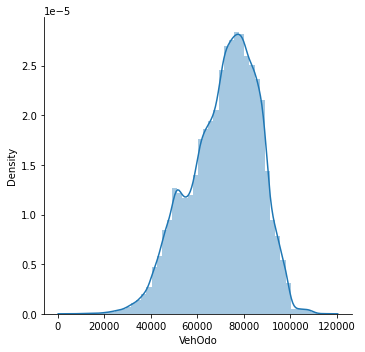

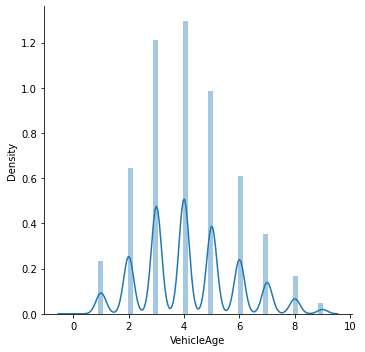

In [108]:
## DISTRIBUTION PLOTS

sns.FacetGrid(df,size=5).map(sns.distplot,"VehOdo").add_legend()
sns.FacetGrid(df,size=5).map(sns.distplot,"VehicleAge").add_legend()

C:\Users\Shreya Pamecha\anaconda3\envs\new_env\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Shreya Pamecha\anaconda3\envs\new_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


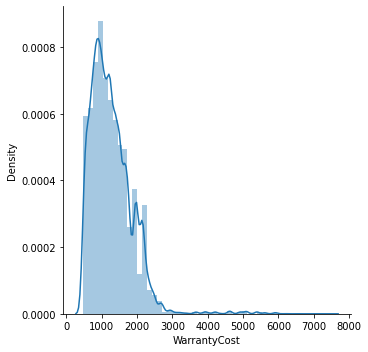

In [109]:
sns.FacetGrid(df,size=5).map(sns.distplot,"WarrantyCost").add_legend()

C:\Users\Shreya Pamecha\anaconda3\envs\new_env\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Shreya Pamecha\anaconda3\envs\new_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Shreya Pamecha\anaconda3\envs\new_env\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Shreya Pamecha\anaconda3\envs\new_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please ad

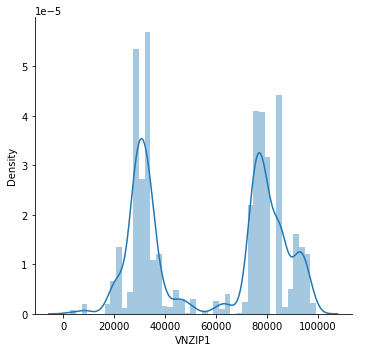

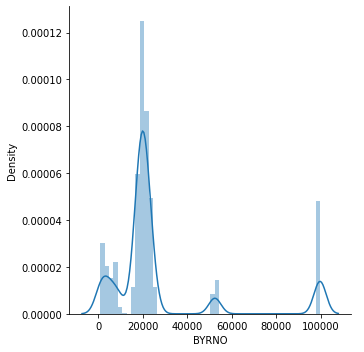

In [110]:
sns.FacetGrid(df,size=5).map(sns.distplot,"VNZIP1").add_legend()
sns.FacetGrid(df,size=5).map(sns.distplot,"BYRNO").add_legend()

C:\Users\Shreya Pamecha\anaconda3\envs\new_env\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Shreya Pamecha\anaconda3\envs\new_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Shreya Pamecha\anaconda3\envs\new_env\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Shreya Pamecha\anaconda3\envs\new_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please ad

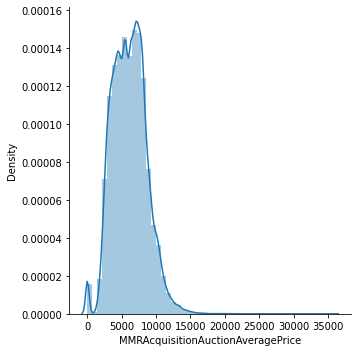

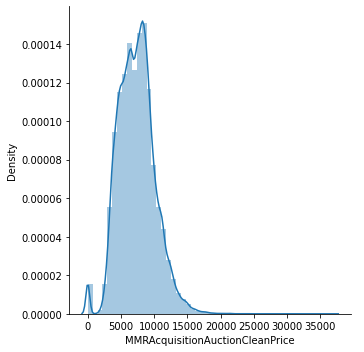

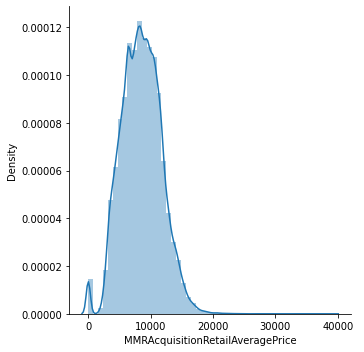

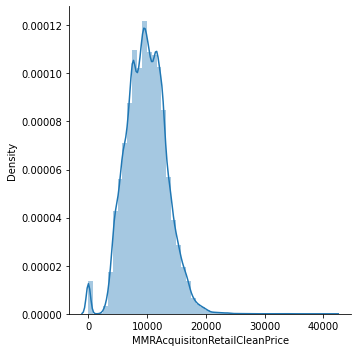

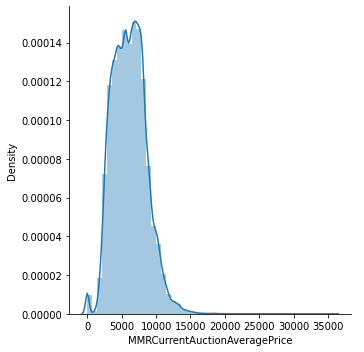

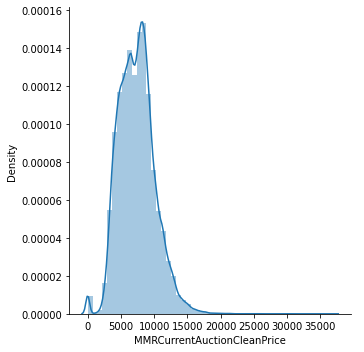

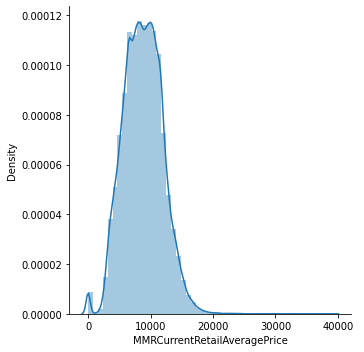

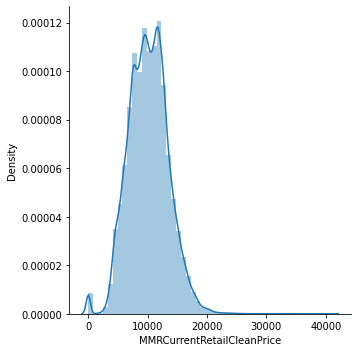

In [111]:
sns.FacetGrid(df,size=5).map(sns.distplot,"MMRAcquisitionAuctionAveragePrice").add_legend()
sns.FacetGrid(df,size=5).map(sns.distplot,"MMRAcquisitionAuctionCleanPrice").add_legend()
sns.FacetGrid(df,size=5).map(sns.distplot,"MMRAcquisitionRetailAveragePrice").add_legend()
sns.FacetGrid(df,size=5).map(sns.distplot,"MMRAcquisitonRetailCleanPrice").add_legend()
sns.FacetGrid(df,size=5).map(sns.distplot,"MMRCurrentAuctionAveragePrice").add_legend()
sns.FacetGrid(df,size=5).map(sns.distplot,"MMRCurrentAuctionCleanPrice").add_legend()
sns.FacetGrid(df,size=5).map(sns.distplot,"MMRCurrentRetailAveragePrice").add_legend()
sns.FacetGrid(df,size=5).map(sns.distplot,"MMRCurrentRetailCleanPrice").add_legend()

These are frequency plots. Some of the features like 'VehOdo','VehicleAge' have guassian distribution (which means data is internally consistent). 
'WarrantyCost' has skewed distribution.
MMR features displays similar characteristics. 
The remaining features don't exhibit any distribution.


### Bivariate Analysis

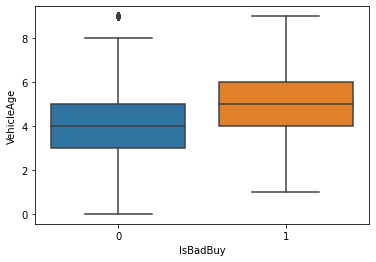

In [112]:
## Box Plot

sns.boxplot(x='IsBadBuy',y='VehicleAge',data=df)
plt.show()

#Though it was evident earlier also; that the higher the vehicle age, the more will be the probability of it being a bad buy.

In [113]:
df.corr(method ='pearson')

## The MMR features are highly correlated to each other. And, MMR is correlated with VehBCost also.

,IsBadBuy,VehicleAge,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost
IsBadBuy,1.000000,0.167164,-0.041371,0.082560,-0.109362,-0.103065,-0.087533,-0.083782,-0.109387,-0.104197,-0.104179,-0.100437,-0.061488,0.005796,-0.099911,-0.003697,0.052319
VehicleAge,0.167164,1.000000,-0.251101,0.319794,-0.565583,-0.518707,-0.460765,-0.426293,-0.576151,-0.532726,-0.504374,-0.469424,-0.268269,-0.074857,-0.312329,-0.024771,0.259310
WheelTypeID,-0.041371,-0.251101,1.000000,-0.212041,-0.096119,-0.130159,-0.072654,-0.102004,-0.088123,-0.120818,-0.073201,-0.101498,0.186134,0.009644,-0.162967,-0.005715,-0.134252
VehOdo,0.082560,0.319794,-0.212041,1.000000,-0.016929,0.024701,0.031380,0.063235,-0.030277,0.010795,0.014227,0.046696,-0.288456,-0.053041,-0.062008,0.029556,0.411718
MMRAcquisitionAuctionAveragePrice,-0.109362,-0.565583,-0.096119,-0.016929,1.000000,0.990350,0.910425,0.910221,0.938046,0.932691,0.872075,0.871279,0.107722,0.045622,0.789911,0.038770,-0.050299
MMRAcquisitionAuctionCleanPrice,-0.103065,-0.518707,-0.130159,0.024701,0.990350,1.000000,0.902755,0.918273,0.923750,0.932318,0.861037,0.871505,0.062499,0.040607,0.781599,0.038618,-0.020533
MMRAcquisitionRetailAveragePrice,-0.087533,-0.460765,-0.072654,0.031380,0.910425,0.902755,1.000000,0.990205,0.851839,0.849681,0.913408,0.906388,0.107499,0.035430,0.746222,0.080573,-0.053337
MMRAcquisitonRetailCleanPrice,-0.083782,-0.426293,-0.102004,0.063235,0.910221,0.918273,0.990205,1.000000,0.846927,0.855849,0.903405,0.907099,0.069665,0.031229,0.745070,0.077615,-0.026830
MMRCurrentAuctionAveragePrice,-0.109387,-0.576151,-0.088123,-0.030277,0.938046,0.923750,0.851839,0.846927,1.000000,0.990304,0.915213,0.912283,0.113551,0.049215,0.779170,0.039801,-0.057282
MMRCurrentAuctionCleanPrice,-0.104197,-0.532726,-0.120818,0.010795,0.932691,0.932318,0.849681,0.855849,0.990304,1.000000,0.908849,0.921656,0.070501,0.043791,0.775525,0.040225,-0.028403


<AxesSubplot:xlabel='MMRAcquisitionAuctionAveragePrice', ylabel='MMRAcquisitionAuctionCleanPrice'>

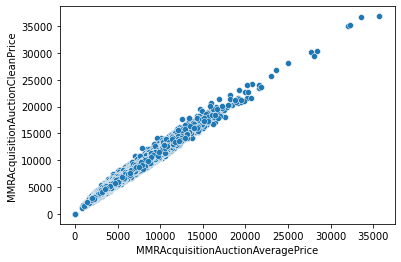

In [114]:
sns.scatterplot(data=df, x="MMRAcquisitionAuctionAveragePrice", y="MMRAcquisitionAuctionCleanPrice")

# These are highly correlated to each other -> Redundant features: can be removed in case of overfitting. During linear modeling,
# we can take care of these features.

           Number_of_bad_buy  Total_buy  Percentage_of_bad_buy
Color                                                         
BEIGE                    211       1585              13.312303
BLACK                    858       7628              11.248034
BLUE                    1189      10347              11.491254
BROWN                     56        437              12.814645
GOLD                     737       5232              14.086391
GREEN                    402       3194              12.586099
GREY                     912       7888              11.561866
MAROON                   260       2046              12.707722
NOT AVAIL                 24         94              25.531915
ORANGE                    34        416               8.173077
OTHER                     29        242              11.983471
PURPLE                    56        374              14.973262
RED                      825       6257              13.185233
SILVER                  1843      14876              12

<AxesSubplot:xlabel='Color'>

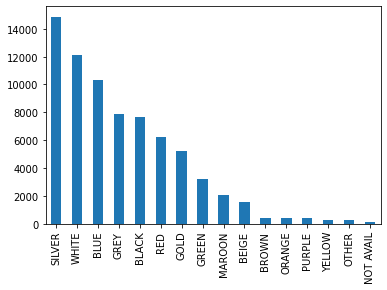

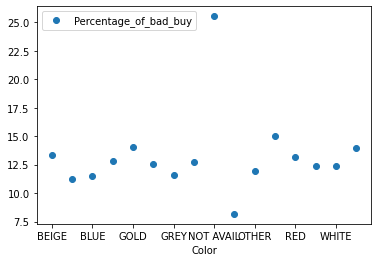

In [115]:
### Color

unique_values_Color = df.Color.unique()
# print(unique_values_Color) #since it has more than one unique element, we can't simply remove this feature.

count = df['Color'].value_counts()
# print(count)

fig, ax = plt.subplots()
df['Color'].value_counts().plot(ax=ax, kind='bar')

#let's see the correlation between 'Auction' and the target variable
df2 = df.groupby('Color')['IsBadBuy'].sum()
df3 = df.groupby('Color')['IsBadBuy'].count()

df4 = pd.merge(df2, df3, left_index=True, right_index=True)
df4.columns = ['Number_of_bad_buy','Total_buy']

df4['Percentage_of_bad_buy'] = (df4['Number_of_bad_buy']/df4['Total_buy'])*100
    

print(df4)
#Looking at the Percentage_of_bad_buy: the Auction provider does have some impact on the target variable 

df4.plot(y='Percentage_of_bad_buy', use_index=True, style='o')



### Feature Engineering

In [116]:
db = df.copy()

#Creating some extra features
db['MMR_diff_AuctionAveragePrice'] = db['MMRAcquisitionAuctionAveragePrice']-db['MMRCurrentAuctionAveragePrice']
db['MMR_diff_AuctionCleanPrice'] = db['MMRAcquisitionAuctionCleanPrice']-db['MMRCurrentAuctionCleanPrice']
db['MMR_diff_RetailAveragePrice'] = db['MMRAcquisitionRetailAveragePrice']-db['MMRCurrentRetailAveragePrice']
db['MMR_diff_RetailCleanPrice'] = db['MMRAcquisitonRetailCleanPrice']-db['MMRCurrentRetailCleanPrice']

In [117]:
db.corr(method='pearson')

,IsBadBuy,VehicleAge,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost,MMR_diff_AuctionAveragePrice,MMR_diff_AuctionCleanPrice,MMR_diff_RetailAveragePrice,MMR_diff_RetailCleanPrice
IsBadBuy,1.000000,0.167164,-0.041371,0.082560,-0.109362,-0.103065,-0.087533,-0.083782,-0.109387,-0.104197,-0.104179,-0.100437,-0.061488,0.005796,-0.099911,-0.003697,0.052319,-0.003494,-0.000855,0.035068,0.033694
VehicleAge,0.167164,1.000000,-0.251101,0.319794,-0.565583,-0.518707,-0.460765,-0.426293,-0.576151,-0.532726,-0.504374,-0.469424,-0.268269,-0.074857,-0.312329,-0.024771,0.259310,0.011392,0.018145,0.080091,0.076136
WheelTypeID,-0.041371,-0.251101,1.000000,-0.212041,-0.096119,-0.130159,-0.072654,-0.102004,-0.088123,-0.120818,-0.073201,-0.101498,0.186134,0.009644,-0.162967,-0.005715,-0.134252,-0.025708,-0.030128,-0.002401,-0.006578
VehOdo,0.082560,0.319794,-0.212041,1.000000,-0.016929,0.024701,0.031380,0.063235,-0.030277,0.010795,0.014227,0.046696,-0.288456,-0.053041,-0.062008,0.029556,0.411718,0.037130,0.038445,0.042328,0.041236
MMRAcquisitionAuctionAveragePrice,-0.109362,-0.565583,-0.096119,-0.016929,1.000000,0.990350,0.910425,0.910221,0.938046,0.932691,0.872075,0.871279,0.107722,0.045622,0.789911,0.038770,-0.050299,0.207512,0.193069,0.137417,0.137536
MMRAcquisitionAuctionCleanPrice,-0.103065,-0.518707,-0.130159,0.024701,0.990350,1.000000,0.902755,0.918273,0.923750,0.932318,0.861037,0.871505,0.062499,0.040607,0.781599,0.038618,-0.020533,0.220315,0.220466,0.145024,0.155886
MMRAcquisitionRetailAveragePrice,-0.087533,-0.460765,-0.072654,0.031380,0.910425,0.902755,1.000000,0.990205,0.851839,0.849681,0.913408,0.906388,0.107499,0.035430,0.746222,0.080573,-0.053337,0.195081,0.177379,0.256530,0.244559
MMRAcquisitonRetailCleanPrice,-0.083782,-0.426293,-0.102004,0.063235,0.910221,0.918273,0.990205,1.000000,0.846927,0.855849,0.903405,0.907099,0.069665,0.031229,0.745070,0.077615,-0.026830,0.208367,0.203186,0.256522,0.265884
MMRCurrentAuctionAveragePrice,-0.109387,-0.576151,-0.088123,-0.030277,0.938046,0.923750,0.851839,0.846927,1.000000,0.990304,0.915213,0.912283,0.113551,0.049215,0.779170,0.039801,-0.057282,-0.144313,-0.144481,-0.107112,-0.104695
MMRCurrentAuctionCleanPrice,-0.104197,-0.532726,-0.120818,0.010795,0.932691,0.932318,0.849681,0.855849,0.990304,1.000000,0.908849,0.921656,0.070501,0.043791,0.775525,0.040225,-0.028403,-0.132233,-0.147196,-0.097235,-0.105253


For Modeling, we need to convert every categorical feature into numeric form. 
For now, I will be ordinally encoding these features (which may not be that effective). If I would have given more time and resources, I would have gotten advanced features and top-of-the-line parts like 'enginer properties', 'braking system', etc. in correspondence with the model, submodel. 

Factors affecting car longevity:
1. Advanced features & top-of-the-line parts 
2. Auto or Manual ('Transmission')
3. Wheel Type ('WheelTypeID')
4. Car Manufacturing company ('Nationality', 'TopThreeAmericanName') [According to a report, cars manufactured by Japanese companies are at the top of the list of higher life spans]
5. Advanced vehicle monitoring system

In [118]:
#From PurchDate, we can get three separate features: 'Day', 'Month' and 'Year'

# db['PurchDate'] = pd.to_datetime(db['PurchDate'],format='%Y%m%d') 
db['Purch_year'] = pd.DatetimeIndex(db['PurchDate']).year
db['Purch_month'] = pd.DatetimeIndex(db['PurchDate']).month
db['Purch_date'] = pd.DatetimeIndex(db['PurchDate']).day

In [123]:
db = db.drop(['PurchDate'],axis=1)
# db = db.drop(['Unnamed: 0'],axis=1)
# db

In [124]:
db.to_csv('dataframe_training.csv')